# 利用sklearn库中的手写数字数据集，自己编程实现K-means与PCA算法，实现对数据的降维与聚类
1. 数据集准备
2. K-means
3. PCA
4. 结果展示


In [103]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np

# 加载手写数字数据集
digits = load_digits()
X_digits, y_digits = digits.data, digits.target

In [104]:
# 检查是否存在 NaN 或 Inf
print(f"NaN count: {np.isnan(X_digits).sum()}")
print(f"Inf count: {np.isinf(X_digits).sum()}")

NaN count: 0
Inf count: 0


In [105]:
# 设置Matplotlib使用的字体为系统默认的中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

In [106]:
import numpy as np

def kmeans(X, k, max_iters=100, tol=1e-4):
    """
    自实现K-means算法。
    
    :param X: 输入数据集，形状为 (样本数, 特征数)，表示包含多个样本和其对应特征的二维数组。
    :param k: 聚类的簇数，即我们希望将数据分为多少簇类。
    :param max_iters: 最大迭代次数，用于控制算法的执行上限。
    :param tol: 收敛阈值，表示簇中心在两次更新之间的移动距离小于该值时停止迭代，相当于个早停。
    :return: 一个元组 (labels, centers)，其中：
             - labels: 聚类标签数组，形状为 (样本数,)，表示每个样本所属的簇。
             - centers: 簇中心数组，形状为 (k, 特征数)，表示每个簇的中心位置。
    """
    np.random.seed(42)  # 设置随机种子，保证结果可复现。
    
    # 随机初始化簇中心，从数据集中随机选取 k 个样本作为初始中心。
    centers = X[np.random.choice(X.shape[0], k, replace=False)]
    
    # 初始化每个样本的标签，labels 用于记录每个样本当前所属的簇。
    labels = np.zeros(X.shape[0])
    
    # 开始迭代更新簇中心
    for iteration in range(max_iters):
        # Step 1: 分配样本到最近的簇中心
        for i, sample in enumerate(X):  # 遍历每个样本
            # 计算当前样本与每个簇中心的欧几里得距离
            distances = np.linalg.norm(sample - centers, axis=1)
            # 将样本分配给距离最近的簇中心
            labels[i] = np.argmin(distances)
        
        # Step 2: 计算新的簇中心
        # 根据分配结果，计算每个簇的平均位置作为新的簇中心
        new_centers = np.array([X[labels == j].mean(axis=0) for j in range(k)])
        
        # Step 3: 检查是否收敛
        # 如果所有簇中心的移动距离小于收敛阈值 tol，则停止迭代
        if np.linalg.norm(new_centers - centers) < tol:
            break  # 收敛条件满足，退出循环
        
        # 更新簇中心为新计算的中心
        centers = new_centers
    
    # 返回最终的聚类标签和簇中心
    return labels, centers

# 示例：执行K-means算法
k = 10  # 假设数据集中有10类（如手写数字数据集）
# X_digits 为输入数据集，形状为 (样本数, 特征数)
kmeans_labels, kmeans_centers = kmeans(X_digits, k)

# 注：
# - kmeans_labels 表示每个样本所属的簇标签。
# - kmeans_centers 表示每个簇的最终中心坐标。


In [107]:
import numpy as np

def pca(X, n_components):
    """
    自实现PCA（主成分分析）算法，用于降维。
    
    :param X: 输入数据集，形状为 (样本数, 特征数)，表示包含多个样本和其对应特征的二维数组。
    :param n_components: 降维后的目标维度，即保留的主成分数量。
    :return: 降维后的数据，形状为 (样本数, n_components)。
    """
    # Step 1: 数据中心化
    # 计算每个特征的均值并从数据中减去，保证数据零均值
    X_centered = X - np.mean(X, axis=0)

    # Step 2: 计算协方差矩阵
    # 协方差矩阵描述特征之间的相关性，用于计算主成分方向
    # X_centered.T 是转置操作，将样本和特征互换
    cov_matrix = np.cov(X_centered.T)

    # Step 3: 计算特征值和特征向量
    # 特征值 eig_values 代表每个主成分的方差大小
    # 特征向量 eig_vectors 代表主成分的方向
    eig_values, eig_vectors = np.linalg.eig(cov_matrix)

    # Step 4: 按特征值大小排序
    # 特征值从大到小排序，保留对应的特征向量
    sorted_indices = np.argsort(eig_values)[::-1]  # 降序排列索引
    eig_vectors = eig_vectors[:, sorted_indices]  # 对特征向量进行重新排序

    # Step 5: 选择前 n_components 个主成分
    # 截取对应前 n_components 个特征向量
    principal_components = eig_vectors[:, :n_components]

    # Step 6: 降维
    # 将原始数据投影到主成分方向上
    X_reduced = np.dot(X_centered, principal_components)

    return X_reduced

# X_digits 为输入数据集
# 这边目标是将数据降维到2维
X_pca = pca(X_digits, 2)


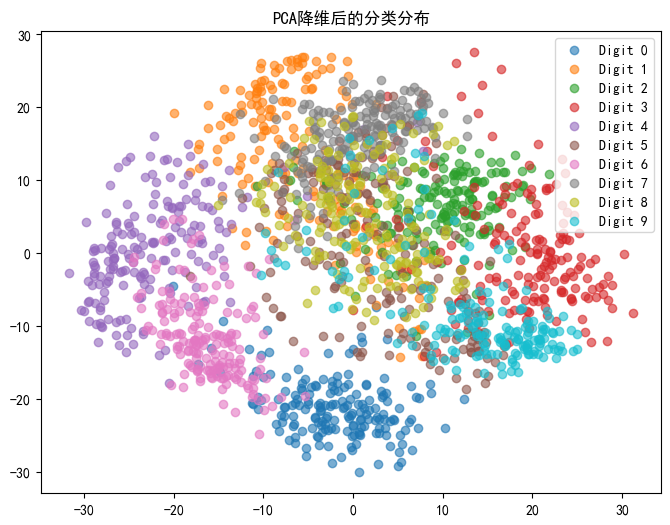

In [108]:
import matplotlib.pyplot as plt

# 绘制PCA降维后的数据分布
plt.figure(figsize=(8, 6))
for i in range(10):
    plt.scatter(X_pca[y_digits == i, 0], X_pca[y_digits == i, 1], label=f"Digit {i}", alpha=0.6)
plt.title("PCA降维后的分类分布")
plt.legend()
plt.show()

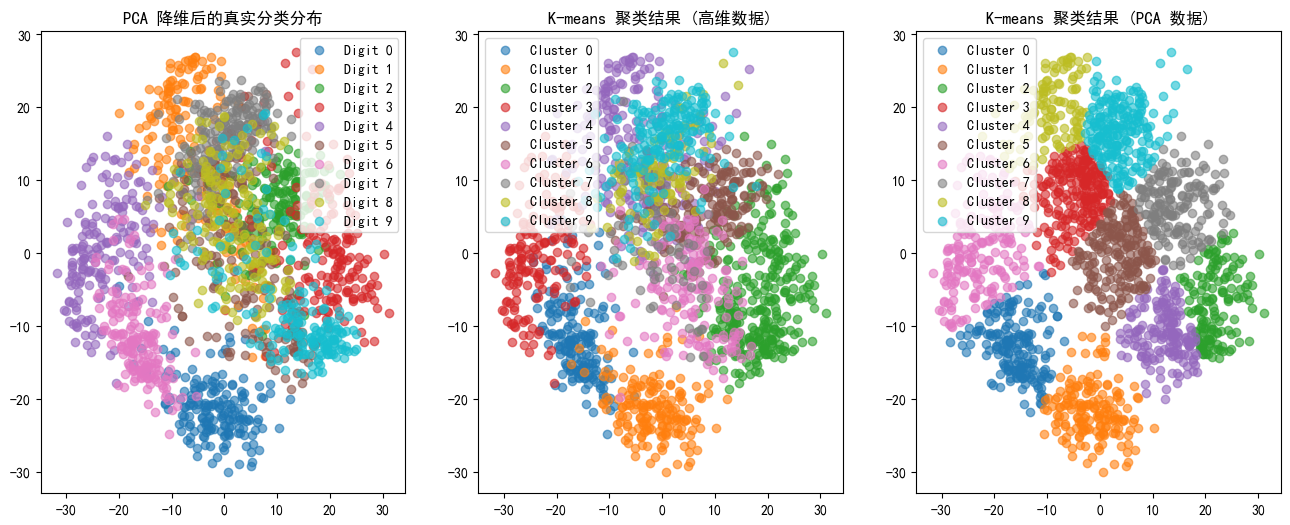

In [109]:
# 在 PCA 前的高维数据上聚类
kmeans_labels_original, _ = kmeans(X_digits, k)

# 在 PCA 后的二维数据上聚类
kmeans_labels_pca, _ = kmeans(X_pca, k)

# 可视化 PCA 后的真实分类
plt.figure(figsize=(16, 6))
plt.subplot(1, 3, 1)
for i in range(10):
    plt.scatter(X_pca[y_digits == i, 0], X_pca[y_digits == i, 1], label=f"Digit {i}", alpha=0.6)
plt.title("PCA 降维后的真实分类分布")
plt.legend()

# 可视化高维数据 K-means 聚类
plt.subplot(1, 3, 2)
for cluster in range(k):
    plt.scatter(X_pca[kmeans_labels_original == cluster, 0], X_pca[kmeans_labels_original == cluster, 1], 
                label=f"Cluster {cluster}", alpha=0.6)
plt.title("K-means 聚类结果 (高维数据)")
plt.legend()

# 可视化 PCA 数据上的 K-means 聚类
plt.subplot(1, 3, 3)
for cluster in range(k):
    plt.scatter(X_pca[kmeans_labels_pca == cluster, 0], X_pca[kmeans_labels_pca == cluster, 1], 
                label=f"Cluster {cluster}", alpha=0.6)
plt.title("K-means 聚类结果 (PCA 数据)")
plt.legend()

plt.show()


# 选做

In [60]:
def kmeans_pp_init(X, k):
    """
    使用 K-means++ 方法初始化簇中心。
    
    :param X: 数据集，形状为 (样本数, 特征数)，包含多个样本和其对应的特征。
    :param k: 簇的数量，即希望生成的初始中心数目。
    :return: 初始化的簇中心，形状为 (k, 特征数)。
    """
    np.random.seed(42)  # 设置随机种子，保证结果可复现
    n_samples = X.shape[0]  # 数据集中的样本数量
    centers = []  # 用于存储初始化的簇中心
    
    # Step 1: 随机选择第一个中心
    # 从数据集中随机选择一个样本作为第一个簇中心
    first_center = X[np.random.choice(n_samples)]
    centers.append(first_center)
    
    # Step 2: 逐步选择剩余的 k-1 个中心
    for _ in range(k - 1):
        # 计算每个样本到最近一个已选择中心的平方距离
        # 对于每个中心，计算所有样本到它的距离，然后取这些距离的最小值
        distances = np.min([np.linalg.norm(X - center, axis=1)**2 for center in centers], axis=0)
        
        # 根据距离分布计算每个样本作为中心的概率
        probabilities = distances / distances.sum()
        
        # 按概率分布随机选择下一个簇中心
        next_center = X[np.random.choice(n_samples, p=probabilities)]
        centers.append(next_center)
    
    return np.array(centers)  # 返回初始化的簇中心数组

In [61]:
def kmeans_with_pp(X, k, max_iters=100, tol=1e-4):
    """
    自实现 K-means 聚类算法，使用 K-means++ 方法初始化簇中心。
    
    :param X: 数据集，形状为 (样本数, 特征数)。
    :param k: 簇的数量。
    :param max_iters: 最大迭代次数，用于控制算法的执行上限。
    :param tol: 收敛阈值，当簇中心更新的移动距离小于此值时停止迭代。
    :return: 聚类标签和簇中心，其中：
             - labels: 聚类标签数组，形状为 (样本数,)。
             - centers: 最终的簇中心，形状为 (k, 特征数)。
    """
    # Step 1: 使用 K-means++ 初始化簇中心
    centers = kmeans_pp_init(X, k)
    
    # 初始化每个样本的标签，labels 用于记录样本所属的簇
    labels = np.zeros(X.shape[0])
    
    # Step 2: 开始迭代更新簇中心
    for iteration in range(max_iters):
        # Step 2.1: 将样本分配到最近的簇中心
        for i, sample in enumerate(X):  # 遍历每个样本
            # 计算样本到所有簇中心的欧几里得距离
            distances = np.linalg.norm(sample - centers, axis=1)
            # 将样本分配给距离最近的簇
            labels[i] = np.argmin(distances)
        
        # Step 2.2: 计算新的簇中心
        # 按照样本分配结果，计算每个簇的平均位置作为新的簇中心
        new_centers = np.array([X[labels == j].mean(axis=0) for j in range(k)])
        
        # Step 2.3: 检查是否收敛
        # 如果所有簇中心的移动距离小于收敛阈值 tol，则停止迭代
        if np.linalg.norm(new_centers - centers) < tol:
            break  # 收敛条件满足，退出循环
        
        # 更新簇中心为新计算的值
        centers = new_centers
    
    # 返回最终的聚类标签和簇中心
    return labels, centers

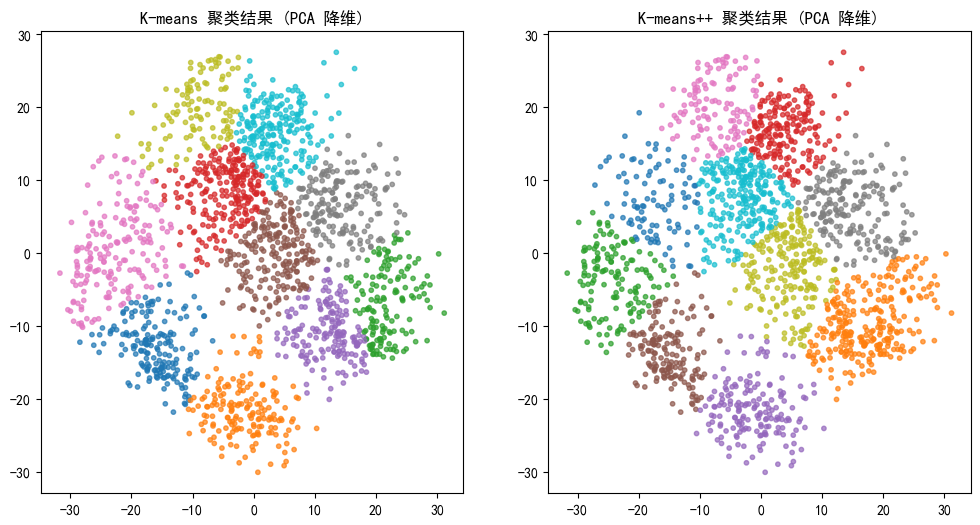

In [110]:
k = 10  # MNIST 数据集有10类

# K-means
labels_kmeans, centers_kmeans = kmeans(X_pca, k)
# K-means++
labels_kmeans_pp, centers_kmeans_pp = kmeans_with_pp(X_pca, k)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_kmeans, cmap='tab10', alpha=0.7, s=10)
plt.title("K-means 聚类结果 (PCA 降维)")

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_kmeans_pp, cmap='tab10', alpha=0.7, s=10)
plt.title("K-means++ 聚类结果 (PCA 降维)")

plt.show()


# 评价

In [111]:
from sklearn.metrics import adjusted_rand_score

# 比较 K-means 和 K-means++ 的聚类标签一致性
ari = adjusted_rand_score(labels_kmeans, labels_kmeans_pp)
print(f"Adjusted Rand Index (ARI): {ari}")

Adjusted Rand Index (ARI): 0.7308096490470042


In [112]:
# 计算初始簇中心间的差异
initial_diff = np.linalg.norm(kmeans_pp_init(X_pca, k) - kmeans(X_pca, k)[1])
print(f"Difference in initial cluster centers: {initial_diff}")

# 计算最终簇中心间的差异
final_diff = np.linalg.norm(centers_kmeans - centers_kmeans_pp)
print(f"Difference in final cluster centers: {final_diff}")

Difference in initial cluster centers: 78.9355907543182
Difference in final cluster centers: 73.69596258705045


In [115]:
from sklearn.metrics import silhouette_score

# 计算轮廓系数
silhouette_kmeans = silhouette_score(X_pca, labels_kmeans)
silhouette_kmeans_pp = silhouette_score(X_pca, labels_kmeans_pp)

print(f"Silhouette Score for K-means: {silhouette_kmeans}")
print(f"Silhouette Score for K-means++: {silhouette_kmeans_pp}")

Silhouette Score for K-means: 0.392723710229583
Silhouette Score for K-means++: 0.39742501041695055


In [117]:
from sklearn.metrics import silhouette_score

# 计算 SSE
sse_kmeans = np.sum((X_pca - centers_kmeans[labels_kmeans.astype(int)])**2)
sse_kmeans_pp = np.sum((X_pca - centers_kmeans_pp[labels_kmeans_pp.astype(int)])**2)

print(f"K-means SSE: {sse_kmeans:.5f}")
print(f"K-means++ SSE: {sse_kmeans_pp:.5f}")


K-means SSE: 56257.25653
K-means++ SSE: 57354.75391


In [120]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

dbi_kmeans = davies_bouldin_score(X_pca, labels_kmeans)
dbi_kmeans_pp = davies_bouldin_score(X_pca, labels_kmeans_pp)

chi_kmeans = calinski_harabasz_score(X_pca, labels_kmeans)
chi_kmeans_pp = calinski_harabasz_score(X_pca, labels_kmeans_pp)

print(f"K-means DBI: {dbi_kmeans:.2f}, CHI: {chi_kmeans:.2f}")
print(f"K-means++ DBI: {dbi_kmeans_pp:.2f}, CHI: {chi_kmeans_pp:.2f}")


K-means DBI: 0.80, CHI: 1973.92
K-means++ DBI: 0.77, CHI: 1932.35
